In [1]:
import numpy as np;
import tensorflow as tf;
from scipy.special import softmax;
from matplotlib import pyplot as plt;

In [5]:
bs = 64;
laeeb = tf.keras.models.load_model("./laeeb/");

def map_func(image, label):
    image = tf.cast(image, tf.uint8);
    image = tf.keras.applications.vgg16.preprocess_input(image);
    return (image, label);

In [3]:
test_ds = tf.keras.utils.image_dataset_from_directory("./Dataset/test/", label_mode="categorical", batch_size=bs, image_size=(50, 50), shuffle=False);
test_ds = test_ds.map(map_func, num_parallel_calls=tf.data.AUTOTUNE, deterministic=False);

Found 6000 files belonging to 20 classes.


In [17]:
laeeb.evaluate(test_ds)

94/94 [==============================] - 162s 2s/step - loss: 0.0540 - binary_accuracy: 0.9984


[0.053975529968738556, 0.998408317565918]

In [18]:
pred = laeeb.predict(test_ds);

94/94 [==============================] - 173s 2s/step


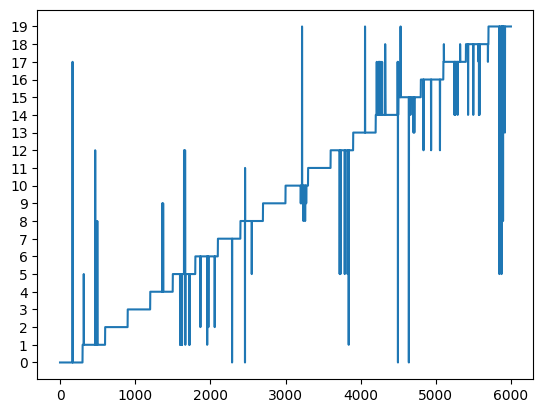

In [23]:
plt.yticks(range(20))
plt.plot(np.argmax(pred, axis=1))

In [14]:
man_test = tf.keras.utils.image_dataset_from_directory("./demo_data/mask/", label_mode="categorical", batch_size=bs, image_size=(50, 50), shuffle=False);
man_test = man_test.map(map_func, num_parallel_calls=tf.data.AUTOTUNE, deterministic=False);

Found 4 files belonging to 20 classes.


In [5]:
laeeb.evaluate(man_test)

1/1 [==============================] - 1s 815ms/step - loss: 5.3876 - binary_accuracy: 0.9000


[5.387553691864014, 0.8999999761581421]

In [15]:
np.argmax(laeeb.predict(man_test), axis=1)

1/1 [==============================] - 0s 395ms/step


array([ 0,  1,  5, 13], dtype=int64)

In [7]:
def test(img_path: str):
    img = np.array(tf.keras.utils.load_img(img_path))
    img = tf.keras.applications.vgg16.preprocess_input(img)
    img = np.expand_dims(img, axis=0)
    res = softmax(laeeb.predict(img))[0]
    # plt.plot(res)
    # plt.show()
    return np.argmax(res);

In [ ]:
mp = [];
for i in range(20):
    mp.append(np.mean([
        test("./Dataset/test/"+str(i)+"/901.jpg"),
        test("./Dataset/test/"+str(i)+"/902.jpg"),
        test("./Dataset/test/"+str(i)+"/903.jpg"),
        test("./Dataset/test/"+str(i)+"/904.jpg"),
        test("./Dataset/test/"+str(i)+"/905.jpg"),
    ]));

In [9]:
print(mp)

[7.0, 9.2, 4.4, 5.6, 5.0, 13.2, 12.8, 7.4, 12.0, 17.6, 6.0, 10.4, 7.6, 10.4, 11.0, 6.4, 6.4, 9.8, 8.4, 7.0]


1/1 [==============================] - 0s 479ms/step


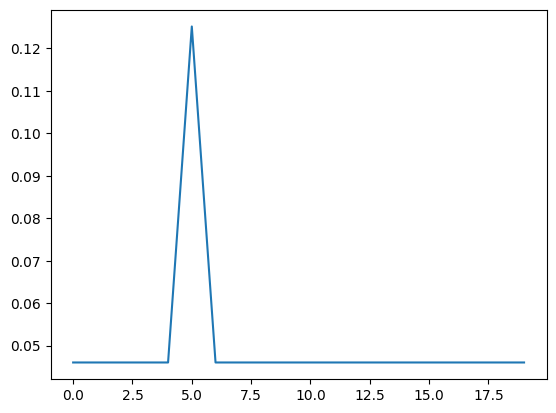

5

In [16]:
# test("./demo_data/mask/2/01.jpg");
test("./Dataset/test/2/1069.jpg")